In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#roll two dice randomly and add result
die = pd.DataFrame([1,2,3,4,5,6])
sumDice = die.sample(2,replace=True).sum().loc[0]
print('The sum of dice is ', sumDice)

The sum of dice is  10


In [8]:
np.random.seed(1)
die = pd.DataFrame([1,2,3,4,5,6])
sumOfThree = die.sample(3,replace=True).sum().loc[0]
print('The sum of the three dice is ', sumOfThree)

The sum of the three dice is  15


In [14]:
#roll the dice 50 times
trial = 50
result = [die.sample(2, replace = True).sum().loc[0] for i in range(trial)]
print(result[:10]) #print the first 10 results for the dice

[9, 2, 11, 8, 4, 10, 2, 11, 5, 6]


In [18]:
#frequency results of die roll
frequency = pd.DataFrame(result)[0].value_counts()
sort_frequency = frequency.sort_index()
print(sort_frequency)

2     4
3     3
4     2
5     8
6     6
7     3
8     8
9     5
10    5
11    5
12    1
Name: 0, dtype: int64


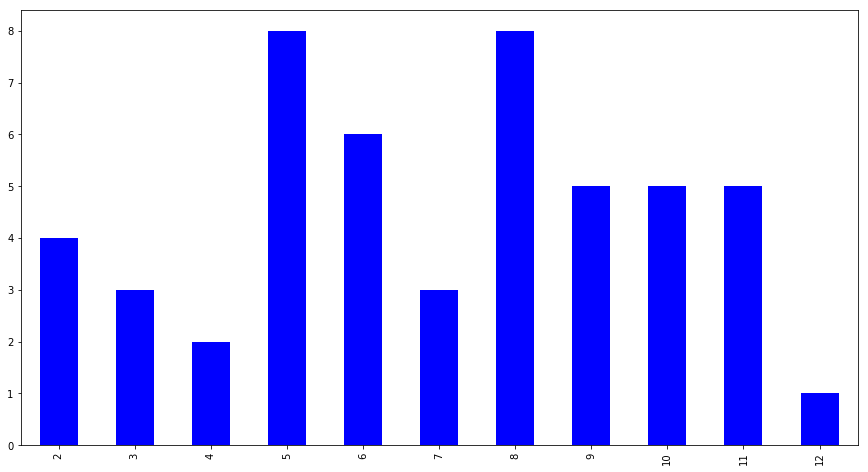

In [19]:
#bar chart for frequency results
sort_frequency.plot(kind='bar',color='blue',figsize=(15,8))

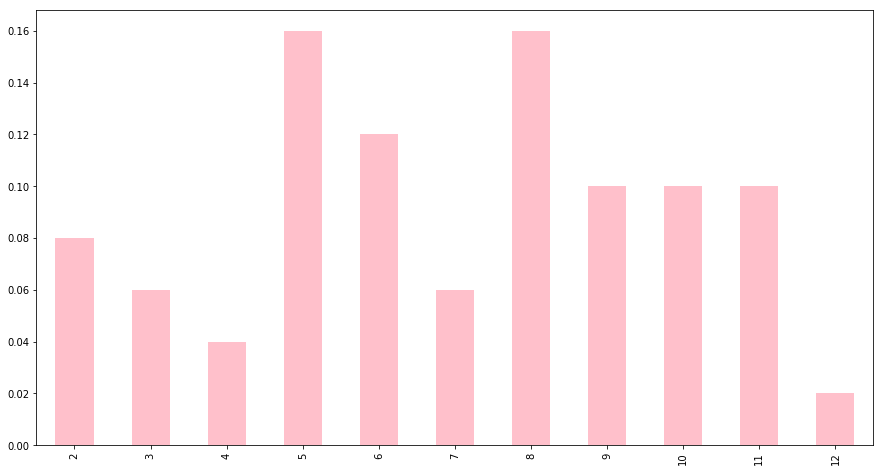

In [20]:
relative_freq = sort_frequency/trial
relative_freq.plot(kind='bar',color='pink',figsize=(15,8))

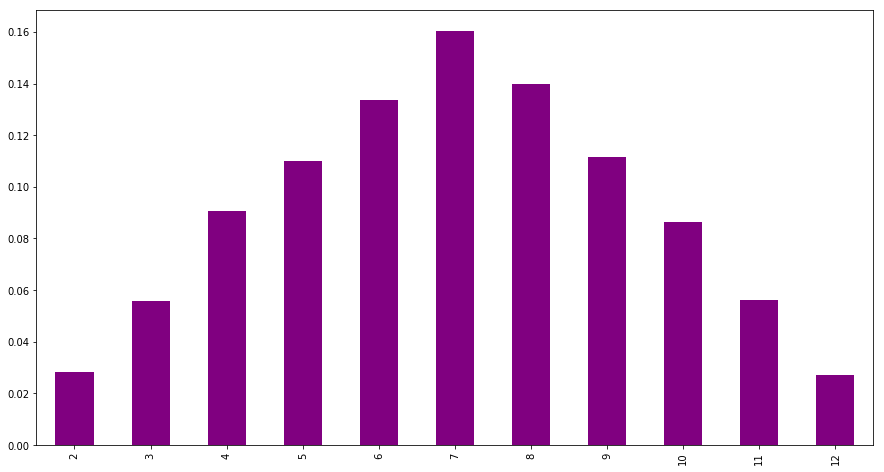

In [21]:
trial = 10000
result = [die.sample(2,replace=True).sum().loc[0] for i in range(trial)]
frequency = pd.DataFrame(result)[0].value_counts()
sort_frequency = frequency.sort_index()
relative_freq = sort_frequency/trial
relative_freq.plot(kind = 'bar',color='purple',figsize=(15,8))

In [22]:
X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri
#x distribution for die roll

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [24]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum() #gets the mean for dice roll
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum() #gets variance
print(mean, var)

6.999999999999998 5.833333333333333


In [25]:
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [26]:
results = pd.Series(results)
print(results.mean(), results.var())

7.00735 5.840788016901611


In [29]:
ms = pd.read_csv('microsoft.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [30]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

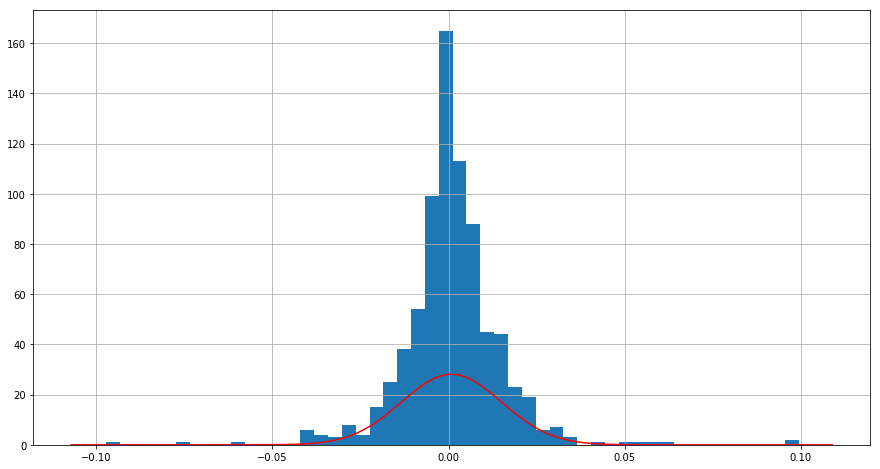

In [32]:
#histogram plot and density line
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [33]:
#probability that the stock price will drop over 5%
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677817


In [34]:
#probability that microsoft stock price will drop over 10%
prob_return1 = norm.cdf(-0.1, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  6.056775634858521e-13


In [35]:
# probability of a 40% drop in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.002912363313330548


In [37]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = None
print('The probability of dropping over 20% in 220 days is ', norm.cdf(-0.2,mu220,sigma220))

The probability of dropping over 20% in 220 days is  0.03535237727490905


In [38]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.022523362407065


In [39]:
# quantile exercise  
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.022523362407065
95% quantile  0.024163825379311034


In [42]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
print('25% quantile ', norm.ppf(0.25,mu,sigma))
# 75% quantile
print('75% quantile ', norm.ppf(0.75,mu,sigma))

25% quantile  -0.008752057838414963
75% quantile  0.010392520810661006
